# **Lecture 2: Mean-Variance Portfolios**

**Objective**: To construct and analyse portfolios consisting of stocks and bonds, extend the <br>
analysis to international equities, identify efficient portfolios for a given target return, and <br>
determine the minimum-variance portfolio.

## **Part I - Stock and Bonds**

### **1. Download Stock and Bonds Data**

Using the `yfinance` library, download 10 years of adjusted daily close prices for the  <br>
*ETF SPY (US equities)* and *LQD (corporate bonds)*. Store them in a DataFrame

In [17]:
import yfinance as yf
import pandas as pd
import numpy as np

# Download data
data = yf.download(["SPY", "LQD"], start="2015-01-01", end="2025-01-01", 
                   group_by='ticker', auto_adjust=True)

# Extract close prices
prices = pd.DataFrame({
    'SPY': data['SPY']['Close'],
    'LQD': data['LQD']['Close']
}).dropna()

[*********************100%***********************]  2 of 2 completed


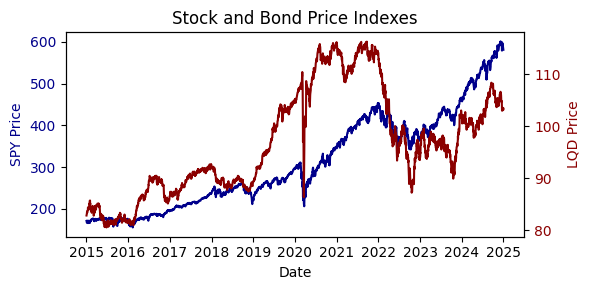

In [18]:
import matplotlib.pyplot as plt

# Create figure
fig, ax1 = plt.subplots(figsize=(6, 3))

# Plot SPY
ax1.plot(prices.index, prices['SPY'], label='SPY (Stocks)', color='darkblue')
ax1.set_xlabel('Date')
ax1.set_ylabel('SPY Price', color='darkblue')
ax1.tick_params(axis='y', labelcolor='darkblue')

# Plot LQD
ax2 = ax1.twinx()
ax2.plot(prices.index, prices['LQD'], label='LQD (Bonds)', color='darkred')
ax2.set_ylabel('LQD Price', color='darkred')
ax2.tick_params(axis='y', labelcolor='darkred')

plt.title('Stock and Bond Price Indexes')
fig.tight_layout()
plt.show()

### **2. Compute returns and risk measures**

From prices, calculate daily returns. Then compute annualized mean return, variance, <br>
and volatility (assume 252 trading days).

In [32]:
# Daily returns
returns = prices.pct_change().dropna()

# Annualized metrics
mu_annual = returns.mean() * 252
var_annual = returns.var() * 252
std_annual = returns.std() * np.sqrt(252)
cov_annual = returns.cov() * 252
corr = returns.corr()

mu_spy = mu_annual['SPY'] 
mu_lqd = mu_annual['LQD'] 
var_spy = var_annual['SPY'] 
var_lqd = var_annual['LQD'] 
std_spy = std_annual['SPY'] 
std_lqd = std_annual['LQD'] 
cov_spy_lqd = cov_annual.loc['SPY', 'LQD'] 
corr_spy_lqd = corr.loc['SPY', 'LQD']  

Summarize in a table. Build a one-row summary with: <br>
$\mu_{S P Y}, \mu_{L Q D}, \sigma_{S P Y}^2, \sigma_{L Q D}^2, \sigma_{S P Y}, \sigma_{L Q D}, \sigma_{S P Y-L Q D}, \rho_{S P Y-L Q D}$.

In [36]:
data_tbl = pd.DataFrame(
    [[
        mu_spy, mu_lqd, var_spy, var_lqd,
        std_spy, std_lqd, cov_spy_lqd, corr_spy_lqd
    ]],
    columns=[
        r"$\mu_{SPY}$", r"$\mu_{LQD}$",
        r"$\sigma^{2}_{SPY}$", r"$\sigma^{2}_{LQD}$",
        r"$\sigma_{SPY}$", r"$\sigma_{LQD}$",
        r"$\sigma_{SPY-LQD}$", r"$\rho_{SPY-LQD}$"
    ],
)

for col in data_tbl.columns[:-1]:
    data_tbl[col] = data_tbl[col].map(lambda x: f"{x*100:.2f} %")

data_tbl

,$\mu_{SPY}$,$\mu_{LQD}$,$\sigma^{2}_{SPY}$,$\sigma^{2}_{LQD}$,$\sigma_{SPY}$,$\sigma_{LQD}$,$\sigma_{SPY-LQD}$,$\rho_{SPY-LQD}$
0,13.81 %,2.58 %,3.10 %,0.74 %,17.62 %,8.61 %,0.40 %,0.262516


### **3. Stock and Bonds Portfolios**

For weights $w \in\{0,0.1, \ldots, 1\}$ applied to SPY (and $1-w$ to LQD), compute <br>
portfolio return and volatility. Create a table with columns: *Weight SPY, Weight <br>
LQD, Annual Return (\%), Annual Volatility (\%)*.

In [38]:
# Create range of weights for SPY
weights = np.linspace(0, 1, 11)

results = [] # Store results

for w in weights:
    w_spy = w
    w_lqd = 1 - w 
    port_return = w_spy * mu_spy + w_lqd * mu_lqd

    # Portfolio variance and volatility
    port_var = (
        w_spy**2 * var_spy +
        w_lqd**2 * var_lqd +
        2 * w_spy * w_lqd * cov_spy_lqd
    )
    port_vol = np.sqrt(port_var)

    results.append([
        f"{int(w_spy * 100)}%",
        f"{int(w_lqd * 100)}%",
        port_return * 100,
        port_vol * 100
    ])

# Create a summary table
portfolio_df = pd.DataFrame(results, columns=[
    "Weight SPY", "Weight LQD", "Annual Return (%)", "Annual Volatility (%)"
])

portfolio_df

,Weight SPY,Weight LQD,Annual Return (%),Annual Volatility (%)
0,0%,100%,2.576550,8.612282
1,10%,90%,3.699999,8.387694
2,20%,80%,4.823449,8.522569
3,30%,70%,5.946899,9.000762
4,40%,60%,7.070349,9.772001
5,50%,50%,8.193798,10.773536
6,60%,39%,9.317248,11.947589
7,70%,29%,10.440698,13.248376
8,80%,19%,11.564148,14.642159
9,90%,9%,12.687597,16.104811


Plot the risk-return curve. 

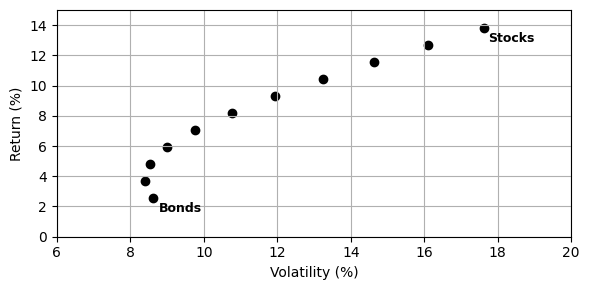

In [40]:
plt.figure(figsize=(6, 3))
plt.scatter(portfolio_df["Annual Volatility (%)"], portfolio_df["Annual Return (%)"], marker='o', color="black")
plt.xlabel("Volatility (%)")
plt.ylabel("Return (%)")
plt.xlim([6,20])
plt.ylim([0,15])

# Identify min and max volatility rows
min_vol_row = portfolio_df.loc[portfolio_df["Annual Return (%)"].idxmin()]
max_vol_row = portfolio_df.loc[portfolio_df["Annual Return (%)"].idxmax()]

# Annotate "bonds" at lowest volatility
plt.annotate("Bonds",
             (min_vol_row["Annual Volatility (%)"], min_vol_row["Annual Return (%)"]),
             textcoords="offset points", xytext=(20,-10), ha='center', fontsize=9, fontweight='bold')

# Annotate "stocks" at highest volatility
plt.annotate("Stocks",
             (max_vol_row["Annual Volatility (%)"], max_vol_row["Annual Return (%)"]),
             textcoords="offset points", xytext=(20,-10), ha='center', fontsize=9, fontweight='bold')

plt.grid(True)
plt.tight_layout()
plt.show()


## **Part II - International Stocks**

### **4. Download International Stock Prices**

| Ticker | Description                     |
|:-------|:--------------------------------|
| AZN    | AstraZeneca (UK, Pharma)        |
| AAPL   | Apple (US, Tech)                |
| BRK-B  | Berkshire Hathaway (US, Conglomerate) |
| JPM    | JPMorgan Chase (US, Bank)       |
| HSBC   | HSBC (UK/Global, Bank)          |
| SAP    | SAP (DE, Software)              |
| LVMUY  | LVMH (FR, Luxury ADR)           |
| ALIZY  | Allianz (DE, Insurance ADR)     |
| SAFRY  | Safran (FR, Aerospace ADR)      |

In [43]:
ticker_labels = {
    "AZN": "AstraZeneca",
    "AAPL": "Apple",
    "BRK-B": "Berkshire Hathaway",
    "JPM": "JPMorgan Chase",
    "HSBC": "HSBC",
    "SAP": "SAP",
    "LVMUY": "LVMH",
    "ALIZY": "Allianz",
    "SAFRY": "Safran"
}

# List of tickers
tickers = list(ticker_labels.keys())

# Download price data
data = yf.download(tickers, start="2015-01-01", end="2025-01-01", group_by='ticker', auto_adjust=True)

# Extract close prices
prices = pd.DataFrame({
    ticker_labels[ticker]: data[ticker]['Close']
    for ticker in tickers if ticker in data
}).dropna()

[*********************100%***********************]  9 of 9 completed


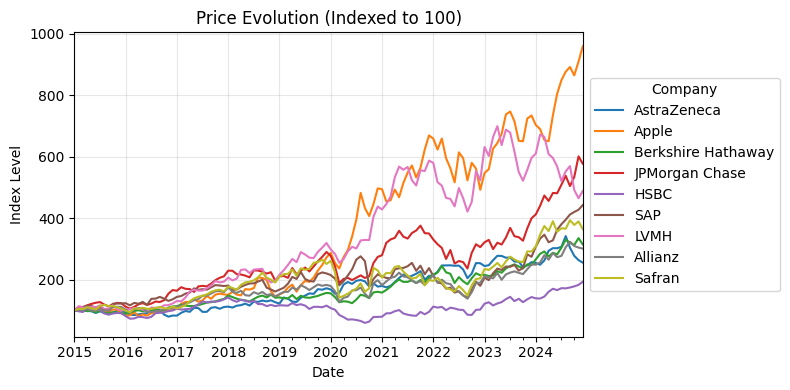

In [47]:
# Plot
to_plot = prices.resample('ME').last()
to_plot = to_plot / to_plot.iloc[0] * 100

fig, ax = plt.subplots(figsize=(8, 4))
to_plot.plot(ax=ax, linewidth=1.5)

ax.set_title('Price Evolution (Indexed to 100)')
ax.set_xlabel('Date')
ax.set_ylabel('Index Level')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Company')
ax.grid(True, alpha=0.3)
fig.tight_layout()
plt.show()


### **5. Compute Returns, Volatilities, and Covariances**
Compute annualized mean returns and covariance matrix (assume 252 trading days).

In [102]:
# Compute daily returns
returns = prices.pct_change().dropna() * 100

# Annualized statistics
mu_annual = returns.mean() * 252
var_annual = returns.var() * 252
std_annual = returns.std() * np.sqrt(252)

# Summary table
summary_tbl = pd.DataFrame({
    'Annual Return (%)': mu_annual,
    'Annual Variance (%)': var_annual,
    'Annual Std Dev (%)': std_annual
}).round(2)

display(summary_tbl)

,Annual Return (%),Annual Variance (%),Annual Std Dev (%)
AstraZeneca,12.54,603.83,24.57
Apple,27.41,810.07,28.46
Berkshire Hathaway,13.01,373.66,19.33
JPMorgan Chase,19.91,749.12,27.37
HSBC,9.44,621.86,24.94
SAP,17.81,706.16,26.57
LVMH,21.00,901.42,30.02
Allianz,14.24,625.40,25.01
Safran,19.84,1200.98,34.66


In [52]:
# Correlation matrix
cov_annual = returns.cov() * 252
corr_annual = returns.corr()

display(corr_annual.round(2))

,AstraZeneca,Apple,Berkshire Hathaway,JPMorgan Chase,HSBC,SAP,LVMH,Allianz,Safran
AstraZeneca,1.00,0.31,0.32,0.25,0.26,0.34,0.34,0.32,0.28
Apple,0.31,1.00,0.51,0.42,0.31,0.48,0.45,0.39,0.34
Berkshire Hathaway,0.32,0.51,1.00,0.77,0.53,0.47,0.51,0.59,0.50
JPMorgan Chase,0.25,0.42,0.77,1.00,0.60,0.42,0.48,0.60,0.53
HSBC,0.26,0.31,0.53,0.60,1.00,0.39,0.48,0.60,0.47
SAP,0.34,0.48,0.47,0.42,0.39,1.00,0.57,0.56,0.48
LVMH,0.34,0.45,0.51,0.48,0.48,0.57,1.00,0.61,0.54
Allianz,0.32,0.39,0.59,0.60,0.60,0.56,0.61,1.00,0.63
Safran,0.28,0.34,0.50,0.53,0.47,0.48,0.54,0.63,1.00


### **6. Plot a random portfolio cloud (risk-return)**

Generate $N=10,000$ long-only portfolios (weights $\geq 0$, sum to 1 ) and scatter volatility (\%) vs. return (\%). <br>
Mark the individual assets as triangles and label them.

In [ ]:
asset_labels = list(ticker_labels.values())
num_assets = len(asset_labels)
num_portfolios = 100000  # Number of random portfolios

# Generate random weights (each row sums to 1)
random_weights = np.random.dirichlet(np.ones(num_assets), size=num_portfolios)

# Compute portfolio returns and volatilities
port_returns = []
port_volatilities = []

for weights in random_weights:
    ret = np.dot(weights, mu_annual)
    vol = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))
    port_returns.append(ret)
    port_volatilities.append(vol)

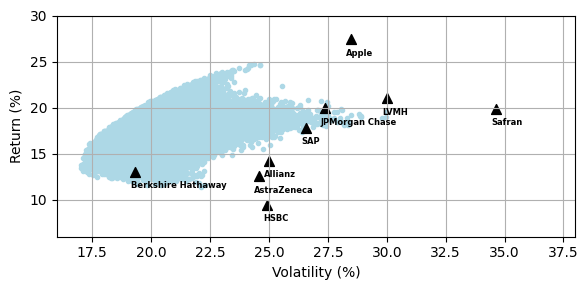

In [73]:
# Plotting
plt.figure(figsize=(6, 3))
plt.scatter(port_volatilities, port_returns, color='lightblue', alpha=0.99, marker='.')

# Plot all individual assets
for asset in asset_labels:
    plt.scatter(std_annual[asset], mu_annual[asset], color='black', marker='^', s=50)
    plt.text(std_annual[asset] -0.2, mu_annual[asset]-1 , asset, fontsize=6, 
             va='top', fontweight="bold",)

plt.xlabel('Volatility (%)')
plt.ylabel('Return (%)')
plt.xlim([16, 38])
plt.ylim([6, 30])
plt.grid(True)
plt.tight_layout()
plt.show()


### **7. Portfolio Optimization with `PyPortfolioOpt`**


Install the library:

`!pip install PyPortfolioOpt`

### **8. Efficient frontier (targets $\rightarrow$ weights \& variance)**

Using EfficientFrontier, the annualized mean and covm from previously, compute optimal long-only portfolios <br>
for a grid of target returns (e.g., from the 20 th to 80 th percentile of mean). For each target, record: <br>
target return, optimal weights (per asset), and resulting volatility (and variance). Produce a table.

In [104]:
# Efficient portfolios for target returns (4% to 14%)
from pypfopt import EfficientFrontier, plotting

target_returns = np.arange(0.14, 0.26, 0.01)*100

target_portfolios = []

for target in target_returns:
    # Use previously computed mu_annual and cov_annual
    ef_target = EfficientFrontier(mu_annual, cov_annual)
    ef_target.efficient_return(target_return=target)
    weights = ef_target.clean_weights()
    ret, std, _ = ef_target.portfolio_performance()
    
    row = {
        "Target Return": f"{target:.0f}%",
        "Expected Return": f"{ret:.1f}%",
        "Volatility": f"{std:.1f}%"
    }
    for asset in asset_labels:
        row[asset] = f"{weights.get(asset, 0):.1%}"
    target_portfolios.append(row)

# Create the DataFrame
df_target_portfolios = pd.DataFrame(target_portfolios)

df_target_portfolios

,Target Return,Expected Return,Volatility,AstraZeneca,Apple,Berkshire Hathaway,JPMorgan Chase,HSBC,SAP,LVMH,Allianz,Safran
0,14%,14.0%,16.8%,25.6%,7.9%,44.1%,0.0%,12.8%,8.8%,0.0%,0.7%,0.0%
1,15%,15.0%,17.0%,24.2%,13.9%,40.6%,0.0%,10.1%,9.3%,0.0%,1.8%,0.0%
2,16%,16.0%,17.3%,22.9%,19.5%,37.3%,0.0%,7.4%,9.6%,0.8%,2.5%,0.0%
3,17%,17.0%,17.7%,22.3%,23.0%,32.0%,4.1%,4.7%,9.5%,2.3%,2.1%,0.0%
4,18%,18.0%,18.2%,21.7%,26.4%,26.7%,8.2%,1.9%,9.5%,3.9%,1.6%,0.0%
5,19%,19.0%,18.8%,21.0%,30.1%,21.0%,12.2%,0.0%,9.4%,5.3%,0.6%,0.5%
6,20%,20.0%,19.4%,19.8%,34.6%,13.4%,15.9%,0.0%,8.9%,6.4%,0.0%,1.0%
7,21%,21.0%,20.1%,18.6%,39.1%,5.5%,19.6%,0.0%,8.3%,7.5%,0.0%,1.4%
8,22%,22.0%,20.9%,16.0%,44.4%,0.0%,22.0%,0.0%,7.1%,8.7%,0.0%,1.8%
9,23%,23.0%,21.8%,10.5%,51.3%,0.0%,21.5%,0.0%,4.4%,10.0%,0.0%,2.3%


### **9. Plot the efficient frontier**

Plot the theoretical frontier using `plotting.plot_efficient_frontier`

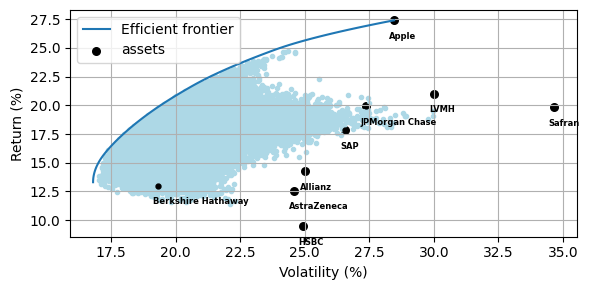

In [105]:
ef = EfficientFrontier(mu_annual, cov_annual)

# Plot Efficient Frontier
fig, ax = plt.subplots(figsize=(6, 3))
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=True)

plt.scatter(port_volatilities, port_returns, color='lightblue', alpha=0.99, marker='.')

# Also show individual assets (optional but aligns with your style)
for asset in asset_labels:
    std_dev = std_annual[asset]
    ret = mu_annual[asset]
    ax.scatter(std_dev, ret, color='black', marker='.', s=50)
    plt.text(std_annual[asset] -0.2, mu_annual[asset]-1 , asset, fontsize=6, 
             va='top', fontweight="bold",)

ax.set_xlabel("Volatility (%)")
ax.set_ylabel("Return (%)")
ax.grid(True)
plt.tight_layout()
plt.show()

### **10. Minimum-variance portfolio**

Compute the global minimum-variance (GMV) portfolio. <br>
Report its weights, expected annual return, and volatility.

In [106]:
ef = EfficientFrontier(mu_annual, cov_annual)
ef.min_volatility()
w_gmv = ef.clean_weights()
ret_gmv, vol_gmv, _ = ef.portfolio_performance()

In [110]:
print(f"Portfolio Return:      {ret_gmv :.2f}%")
print(f"Portfolio Volatility:  {vol_gmv :.2f}%")

Portfolio Return:      13.30%
Portfolio Volatility:  16.80%


In [111]:
df_gmv = pd.DataFrame.from_dict(w_gmv, orient='index', columns=['Weight'])
display(df_gmv)

,Weight
AstraZeneca,0.26624
Apple,0.03682
Berkshire Hathaway,0.46517
JPMorgan Chase,0.00000
HSBC,0.14685
SAP,0.08493
LVMH,0.00000
Allianz,0.00000
Safran,0.00000


### **11. Capital Market Line (CML) with $r_f=0 \%$**

From your earlier results, plot the CML: $R(\sigma)=r_f+S \sigma$ over the range of portfolio volatilities.

In [145]:
# Risk-free rate
risk_free_rate = 0.00

# Efficient Frontier
ef = EfficientFrontier(mu_annual, cov_annual)

# Max Sharpe portfolio
ef_sharpe = ef.deepcopy()
weights_sharpe = ef_sharpe.max_sharpe(risk_free_rate=risk_free_rate)
ret_sharpe, vol_sharpe, sharpe_ratio = ef_sharpe.portfolio_performance()

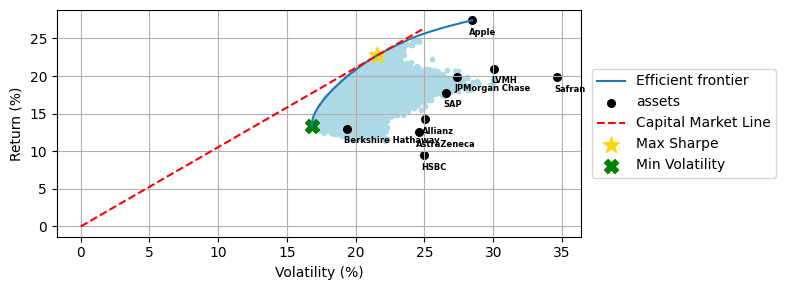

In [146]:
# Plot Efficient Frontier
fig, ax = plt.subplots(figsize=(8, 3))
plt.scatter(port_volatilities, port_returns, color='lightblue', alpha=0.99, marker='.')

plotting.plot_efficient_frontier(ef, ax=ax, show_assets=True)

# Plot Capital Market Line
x = np.linspace(0, 25, 100)
cml = risk_free_rate + (ret_sharpe - risk_free_rate) / vol_sharpe * x
ax.plot(x, cml, linestyle="--", color="red", label="Capital Market Line")

# Plot Max Sharpe and Min Volatility points
ax.scatter(vol_sharpe, ret_sharpe, marker="*", color="gold", s=150, label="Max Sharpe")
ax.scatter(vol_gmv, ret_gmv, marker="X", color="green", s=100, label="Min Volatility")

# Plot individual assets
for asset in asset_labels:
    std_dev = std_annual[asset]
    ret = mu_annual[asset]
    ax.scatter(std_dev, ret, color='black', marker='.', s=50)
    plt.text(std_annual[asset] -0.2, mu_annual[asset]-1 , asset, fontsize=6, 
             va='top', fontweight="bold",)

# Final formatting
ax.set_xlabel("Volatility (%)")
ax.set_ylabel("Return (%)")
ax.legend(loc='center left', bbox_to_anchor=(1.02, 0.5), borderaxespad=0.)
ax.grid(True)
plt.tight_layout()
plt.show()



In [147]:
# Weights 
def format_weights(w, name):
    df = pd.Series(w).rename(name)
    df = df[df > 0.001]  # Filter out near-zero weights
    df = df.apply(lambda x: f"{x:.2%}")
    return df

weights_df = pd.concat([
    format_weights(weights_sharpe, "Max Sharpe"),
    format_weights(w_gmv, "Min Volatility")
], axis=1).fillna("")

weights_df

,Max Sharpe,Min Volatility
AstraZeneca,11.93%,26.62%
Apple,49.48%,3.68%
JPMorgan Chase,21.65%,
SAP,5.08%,8.49%
LVMH,9.65%,
Safran,2.21%,
Berkshire Hathaway,,46.52%
HSBC,,14.69%
